In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [14]:
def load_data():
    data = pd.read_csv("housing_price.csv", index_col=0)
    return data

data = load_data()
# print(data.head())
cols = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
data = data.drop(cols, axis=1)
# print(data.head())
price_mean, price_std = data.mean()[0], data.std()[0]
data = (data - data.mean())/data.std()
# data=data.drop(['Unnamed: 0'],axis=1)
# print(data.head())
data = shuffle(data) 
data.insert(loc=1,column='bias',value=np.ones([data.shape[0],1]))
print(data.head())
inp = data.iloc[:,1:]
# print(inp.head())
outp = data.iloc[:,:1]
print(outp.head())
# train_data, train_label = inp.iloc[:(int)(inp.shape[0]*.75),:] , outp.iloc[:(int)(inp.shape[0]*.75),:] 
# test_data, test_label = inp.iloc[(int)(inp.shape[0]*.75):,:] , outp.iloc[(int)(inp.shape[0]*.75):,:] 
train_data, train_label = inp, outp
test_data, test_label = inp, outp

price  bias   lotsize  bedrooms   bathrms   stories  garagepl
261 -1.015689   1.0  0.115183  1.403330 -0.568973  0.221501 -0.803788
105 -0.379048   1.0 -0.072995  0.047192  1.422433  0.221501  1.518266
217  2.628142   1.0  0.391915  1.403330  3.413838  0.221501  1.518266
129  2.073890   1.0 -0.272243  0.047192  1.422433  0.221501  0.357239
402  0.295042   1.0  1.222113  0.047192 -0.568973 -0.930304  1.518266
        price
261 -1.015689
105 -0.379048
217  2.628142
129  2.073890
402  0.295042


tau :  0.2 => Sqerr :  [338133.03780833]
tau :  0.2 => accuracy :  -3493.9429799752256
tau :  0.30000000000000004 => Sqerr :  [338133.1195641]
tau :  0.30000000000000004 => accuracy :  84.80948353731578
tau :  0.4 => Sqerr :  [338133.14653873]
tau :  0.4 => accuracy :  85.47255655101536
tau :  0.5 => Sqerr :  [338133.17035946]
tau :  0.5 => accuracy :  85.03646830292804
tau :  0.6000000000000001 => Sqerr :  [338133.19517209]
tau :  0.6000000000000001 => accuracy :  84.45839075408254
tau :  0.7000000000000001 => Sqerr :  [338133.22145262]
tau :  0.7000000000000001 => accuracy :  83.82119518402065
tau :  0.8 => Sqerr :  [338133.2488688]
tau :  0.8 => accuracy :  83.32091261759903
tau :  0.9 => Sqerr :  [338133.27733545]
tau :  0.9 => accuracy :  82.85602140157688
tau :  1 => Sqerr :  [0.02952296]
tau :  1 => accuracy :  82.41544912713954
tau :  101 => Sqerr :  [0.07017364]
tau :  101 => accuracy :  79.31472698091287
tau :  201 => Sqerr :  [0.11082623]
tau :  201 => accuracy :  79.3142828

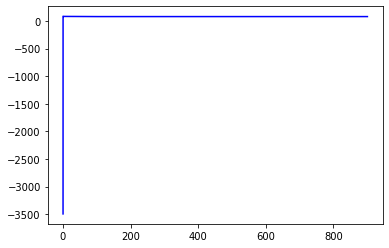

In [15]:
def tau_norm_weights(x, x0, tau):
    weg = np.exp(np.sum((x-x0)*(x-x0), axis=1)/(-2*tau*tau))
    weg = np.diag(weg)
    return np.array(weg)

def error_comp(H,Y):
    return abs((Y - H)/ Y)

def norm(X, Y, X0,tau):
    weg = tau_norm_weights(X, X0, tau)
    XWEG = X.T.dot(weg)
    XY_Li=np.linalg.inv(np.dot(XWEG,X))
    XY=np.dot(XWEG,Y)
    W=np.dot(XY_Li,XY)
    return W

Tau=[]
Accuracy=[]

# for tau in [i*0.1 for i in range(2,10)]:
#     X = np.array(train_data)
#     Y = np.array(train_label)
#     tot = 0.0
#     for x0 in range(len(X)): 
#         W = norm(X, Y, X[x0],tau)
#         prediction = np.array(X[x0].dot(W))
#         prediction = prediction * price_std + price_mean
#         YY = Y[x0] * price_std + price_mean
#         err = error_comp(prediction, YY)
#         tot += err
#     print("tau : ",tau,"=> accuracy : ",(1-(tot/len(X))[0])*100)
#     Tau.append(tau)
#     Accuracy.append((1-(tot/len(X))[0])*100)

for tau in range(1,1001,100):
    X = np.array(train_data)
    Y = np.array(train_label)
    tot = 0.0
    for x0 in range(len(X)): 
        W = norm(X, Y, X[x0],tau)
        prediction = np.array(X[x0].dot(W))
        prediction = prediction * price_std + price_mean
        YY = Y[x0] * price_std + price_mean
        err = error_comp(prediction, YY)
        tot += err
    print("tau : ",tau,"=> accuracy : ",(1-(tot/len(X))[0])*100)
    Tau.append(tau)
    Accuracy.append((1-(tot/len(X))[0])*100)
plt.plot(Tau,Accuracy,'-b')

In [16]:
def gradient_descent(X,Y,W,l,learning_rate,epochs,X0,tau):
    weg = tau_norm_weights(X, X0, tau)
    act_Y = Y.reshape(len(Y))
    for i in range(epochs):
        h_x=X.dot(W)
        W = W - (1/len(Y))*learning_rate*((X.T.dot(weg)).dot(h_x - Y))
    return W
Tau=[]
Accuracy=[]

sqerr = 0
for tau in [i*0.1 for i in range(1,10)]:
    X = np.array(train_data)
    Y = np.array(train_label)
    tot = 0.0
    learning_rate = 1e-1
    epochs = 100
    for x0 in range(len(X)): 
#         W = norm(X, Y, X[x0],tau)
        W = np.zeros([X.shape[1],1])
        W =gradient_descent(X,Y,W,0,learning_rate,epochs,X[x0],tau)
        prediction = np.array(X[x0].dot(W))
        prediction = prediction * price_std + price_mean
        YY = Y[x0] * price_std + price_mean
        err = error_comp(prediction, YY)/ YY
        sqerr += err*err
        tot += err
    print("tau : ",tau,"=> Sqerr : ", sqerr/(2*len(X)))
    print("tau : ",tau,"=> accuracy : ",(1-(tot/len(X))[0])*100)
    Tau.append(tau)
    Accuracy.append((1-(tot/len(X))[0])*100)

for tau in range(1,1001,100):
    X = np.array(train_data)
    Y = np.array(train_label)
    tot = 0.0
    learning_rate = 1e-1
    epochs = 100
    for x0 in range(len(X)): 
#         W = norm(X, Y, X[x0],tau)
        W = np.zeros([X.shape[1],1])
        W =gradient_descent(X,Y,W,0,learning_rate,epochs,X[x0],tau)
        prediction = np.array(X[x0].dot(W))
        prediction = prediction * price_std + price_mean
        YY = Y[x0] * price_std + price_mean
        err = error_comp(prediction, YY)/ YY
        sqerr += err*err
        tot += err
    print("tau : ",tau,"=> Sqerr : ", sqerr/(2*len(X)))
    print("tau : ",tau,"=> accuracy : ",(1-(tot/len(X))[0])*100)
    Tau.append(tau)
    Accuracy.append((1-(tot/len(X))[0])*100)
plt.plot(Tau,Accuracy,'-b')

tau :  0.1 => Sqerr :  [0.05970877]
tau :  0.1 => accuracy :  74.42886926111791
tau :  0.2 => Sqerr :  [0.11096355]
tau :  0.2 => accuracy :  76.2518538586431
tau :  0.30000000000000004 => Sqerr :  [0.15783587]
tau :  0.30000000000000004 => accuracy :  77.331869447052
tau :  0.4 => Sqerr :  [0.2017553]
tau :  0.4 => accuracy :  78.04291626946636
tau :  0.5 => Sqerr :  [0.24252566]
tau :  0.5 => accuracy :  78.79579577751717
tau :  0.6000000000000001 => Sqerr :  [0.28012014]
tau :  0.6000000000000001 => accuracy :  79.57387344775114
tau :  0.7000000000000001 => Sqerr :  [0.31542049]
tau :  0.7000000000000001 => accuracy :  80.15627521372296
tau :  0.8 => Sqerr :  [0.3495383]
tau :  0.8 => accuracy :  80.50289048350898
tau :  0.9 => Sqerr :  [0.38336021]
tau :  0.9 => accuracy :  80.65578594618006
tau :  1 => Sqerr :  [0.41750557]
tau :  1 => accuracy :  80.6839090885675
tau :  101 => Sqerr :  [0.45816111]
tau :  101 => accuracy :  79.3139347866378
